<a href="https://colab.research.google.com/github/Katherasala/rkathera_AML-/blob/main/Text_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models as keras_models, regularizers as keras_regularizers, layers as keras_layers, optimizers as keras_optimizers, losses as keras_losses, metrics as keras_metrics
from keras.models import Sequential as KerasSequential
from keras.layers import Dense as KerasDense
from keras.utils import to_categorical as keras_to_categorical


In [2]:
from keras.layers import Embedding as KerasEmbedding
embedding_layer = KerasEmbedding(1000, 64)
from keras.datasets import imdb as keras_imdb
from keras import preprocessing as keras_preprocessing
from keras.utils import pad_sequences as keras_pad_sequences


In [3]:
num_features = 10000
max_length = 150

(x_train_data, y_train_data), (x_test_data, y_test_data) = keras_imdb.load_data(num_words=num_features)

x_train_data = x_train_data[:100]
y_train_data = y_train_data[:100]

x_train_data = keras_pad_sequences(x_train_data, maxlen=max_length)
x_test_data = keras_pad_sequences(x_test_data, maxlen=max_length)

from keras.models import Sequential as KerasSequential
from keras.layers import Flatten as KerasFlatten, Dense as KerasDense

neural_network = KerasSequential()
neural_network.add(KerasEmbedding(10000, 8, input_length=max_length))
neural_network.add(KerasFlatten())

neural_network.add(KerasDense(1, activation='sigmoid'))
neural_network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
neural_network.summary()

training_history = neural_network.fit(x_train_data, y_train_data,
                                      epochs=10,
                                      batch_size=32,
                                      validation_split=0.2)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - acc: 0.4602 - loss: 0.6942 - val_acc: 0.5000 - val_loss: 0.6883
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - acc: 0.8648 - loss: 0.6663 - val_acc: 0.5000 - val_loss: 0.6886
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - acc: 0.9570 - loss: 0.6466 - val_acc: 0.5000 - val_loss: 0.6881
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - acc: 0.9898 - loss: 0.6300 - val_acc: 0.5500 - val_loss: 0.6882
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - acc: 0.9836 - loss: 0.6123 - val_acc: 0.5000 - val_loss: 0.6878
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - acc: 0.9820 - loss: 0.5979 - val_acc: 0.5500 - val_loss: 0.6875
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.9820 - loss: 0.5798 - val_acc: 0.6000 - val_loss: 0.6874
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.9820 - loss: 0.5620 - val_acc: 0.6000 - val_loss: 0.6879
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.9836 - loss: 0.5410 - va

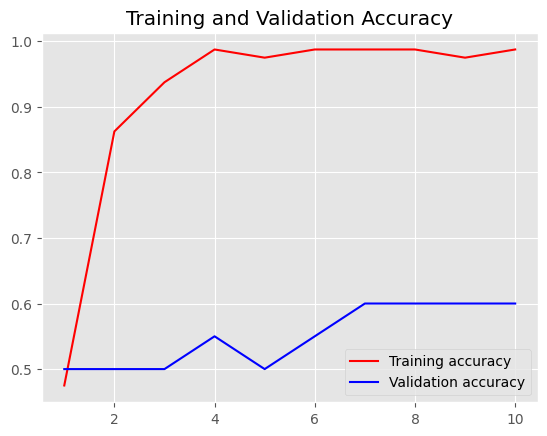

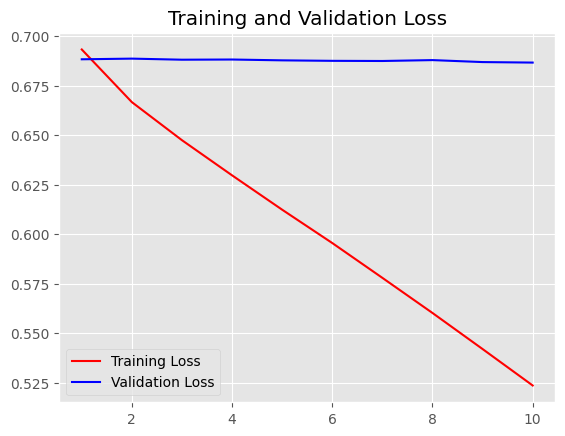

In [4]:
import matplotlib.pyplot as plt

# Training accuracy
train_accuracy = training_history.history["acc"]
# Validation accuracy
validation_accuracy = training_history.history["val_acc"]
# Training loss
train_loss = training_history.history["loss"]
# Validation loss
validation_loss = training_history.history["val_loss"]

epochs_range = range(1, len(train_accuracy) + 1)

plt.plot(epochs_range, train_accuracy, "red", label="Training accuracy")
plt.plot(epochs_range, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs_range, train_loss, "red", label="Training Loss")
plt.plot(epochs_range, validation_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()


In [5]:
test_loss_value, test_accuracy_value = neural_network.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss_value)
print('Test accuracy:', test_accuracy_value)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.4990 - loss: 0.6952
Test loss: 0.6956473588943481
Test accuracy: 0.49619999527931213


In [6]:
num_features = 10000
max_length = 150

(x_train_data, y_train_data), (x_test_data, y_test_data) = keras_imdb.load_data(num_words=num_features)

x_train_data = keras_pad_sequences(x_train_data, maxlen=max_length)
x_test_data = keras_pad_sequences(x_test_data, maxlen=max_length)

combined_texts = np.concatenate((x_train_data, x_test_data), axis=0)
combined_labels = np.concatenate((y_train_data, y_test_data), axis=0)

x_train_data = x_train_data[:5000]
y_train_data = y_train_data[:5000]


In [7]:
neural_network_v2 = KerasSequential()
neural_network_v2.add(KerasEmbedding(10000, 8, input_length=max_length))
neural_network_v2.add(KerasFlatten())
neural_network_v2.add(KerasDense(1, activation='sigmoid'))
neural_network_v2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
neural_network_v2.summary()

training_history_v2 = neural_network_v2.fit(x_train_data, y_train_data,
                                           epochs=10,
                                           batch_size=32,
                                           validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.5223 - loss: 0.6920 - val_acc: 0.5450 - val_loss: 0.6886
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7139 - loss: 0.6682 - val_acc: 0.6800 - val_loss: 0.6636
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8209 - loss: 0.6087 - val_acc: 0.7340 - val_loss: 0.6024
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8636 - loss: 0.5033 - val_acc: 0.7760 - val_loss: 0.5292
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8984 - loss: 0.3920 - val_acc: 0.7940 - val_loss: 0.4746
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9219 - loss: 0.3097 - val_acc: 0.8000 - val_loss: 0.4384
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9483 - loss: 0.2386 - val_acc: 0.8020 - val_loss: 0.4321
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9597 - loss: 0.1956 - val_acc: 0.8070 - val_loss: 0.4162
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

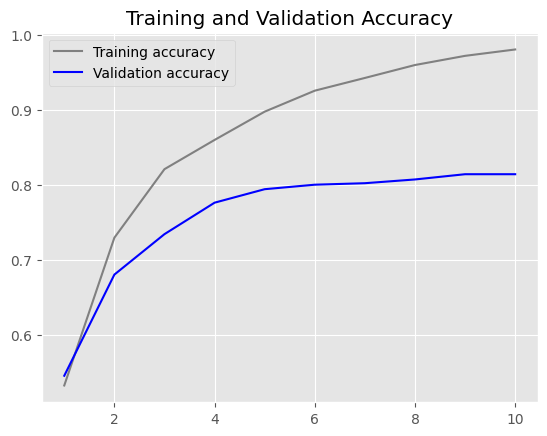

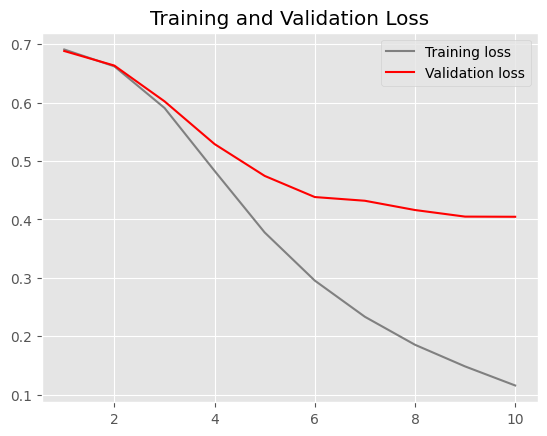

In [8]:
accuracy_v2 = training_history_v2.history['acc']
validation_accuracy_v2 = training_history_v2.history['val_acc']
train_loss_v2 = training_history_v2.history['loss']
validation_loss_v2 = training_history_v2.history['val_loss']

epochs_range_v2 = range(1, len(accuracy_v2) + 1)

plt.plot(epochs_range_v2, accuracy_v2, 'grey', label='Training accuracy')
plt.plot(epochs_range_v2, validation_accuracy_v2, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range_v2, train_loss_v2, 'grey', label='Training loss')
plt.plot(epochs_range_v2, validation_loss_v2, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [9]:
test_loss_v2, test_accuracy_v2 = neural_network_v2.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss_v2)
print('Test accuracy:', test_accuracy_v2)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8196 - loss: 0.3914
Test loss: 0.3880321979522705
Test accuracy: 0.8206800222396851


In [10]:
num_features = 10000
max_length = 150

(x_train_data, y_train_data), (x_test_data, y_test_data) = keras_imdb.load_data(num_words=num_features)

x_train_data = keras_pad_sequences(x_train_data, maxlen=max_length)
x_test_data = keras_pad_sequences(x_test_data, maxlen=max_length)

combined_texts_data = np.concatenate((x_train_data, x_test_data), axis=0)
combined_labels_data = np.concatenate((y_train_data, y_test_data), axis=0)

x_train_data = x_train_data[:1000]
y_train_data = y_train_data[:1000]


In [11]:
neural_network_v3 = KerasSequential()
neural_network_v3.add(KerasEmbedding(10000, 8, input_length=max_length))
neural_network_v3.add(KerasFlatten())
neural_network_v3.add(KerasDense(1, activation='sigmoid'))
neural_network_v3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
neural_network_v3.summary()

training_history_v3 = neural_network_v3.fit(x_train_data, y_train_data,
                                           epochs=10,
                                           batch_size=32,
                                           validation_split=0.2)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - acc: 0.4890 - loss: 0.6935 - val_acc: 0.5350 - val_loss: 0.6921
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.8020 - loss: 0.6759 - val_acc: 0.5650 - val_loss: 0.6913
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9230 - loss: 0.6586 - val_acc: 0.5600 - val_loss: 0.6899
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9404 - loss: 0.6392 - val_acc: 0.5700 - val_loss: 0.6877
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9420 - loss: 0.6113 - val_acc: 0.5750 - val_loss: 0.6847
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9728 - loss: 0.5748 - val_acc: 0.5950 - val_loss: 0.6811
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9671 - loss: 0.5424 - val_acc: 0.6150 - val_loss: 0.6765
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9773 - loss: 0.4938 - val_acc: 0.6350 - val_loss: 0.6710
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9742 - loss:

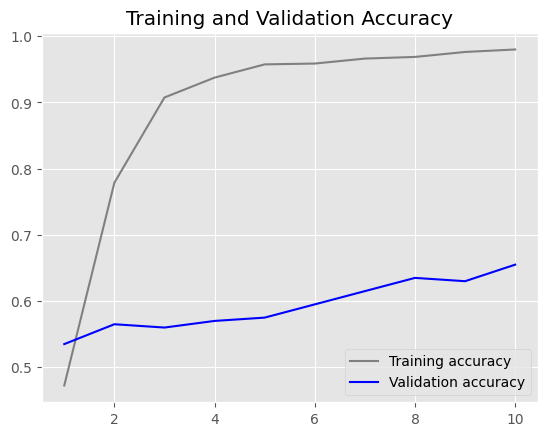

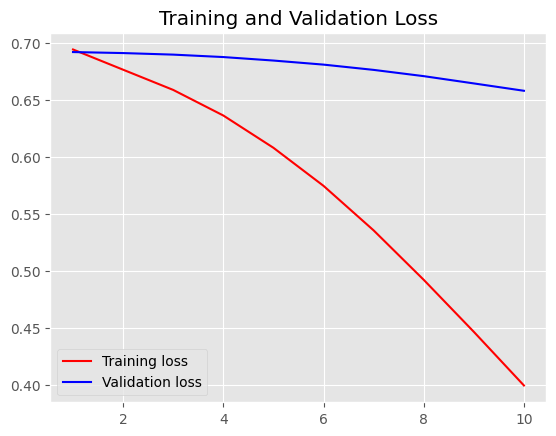

In [12]:
accuracy_v3 = training_history_v3.history["acc"]
validation_accuracy_v3 = training_history_v3.history["val_acc"]
train_loss_v3 = training_history_v3.history["loss"]
validation_loss_v3 = training_history_v3.history["val_loss"]

epochs_range_v3 = range(1, len(accuracy_v3) + 1)

plt.plot(epochs_range_v3, accuracy_v3, "grey", label="Training accuracy")
plt.plot(epochs_range_v3, validation_accuracy_v3, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs_range_v3, train_loss_v3, "red", label="Training loss")
plt.plot(epochs_range_v3, validation_loss_v3, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()


In [13]:
test_loss_v3, test_accuracy_v3 = neural_network_v3.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss_v3)
print('Test accuracy:', test_accuracy_v3)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.5945 - loss: 0.6695
Test loss: 0.6693786978721619
Test accuracy: 0.5935199856758118


In [14]:
num_features = 10000
max_length = 150

(x_train_data, y_train_data), (x_test_data, y_test_data) = keras_imdb.load_data(num_words=num_features)

x_train_data = keras_pad_sequences(x_train_data, maxlen=max_length)
x_test_data = keras_pad_sequences(x_test_data, maxlen=max_length)

combined_texts_data = np.concatenate((x_train_data, x_test_data), axis=0)
combined_labels_data = np.concatenate((y_train_data, y_test_data), axis=0)

x_train_data = x_train_data[:10000]
y_train_data = y_train_data[:10000]


In [15]:
neural_network_v4 = KerasSequential()
neural_network_v4.add(KerasEmbedding(10000, 8, input_length=max_length))
neural_network_v4.add(KerasFlatten())
neural_network_v4.add(KerasDense(1, activation='sigmoid'))
neural_network_v4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
neural_network_v4.summary()

training_history_v4 = neural_network_v4.fit(x_train_data, y_train_data,
                                           epochs=10,
                                           batch_size=32,
                                           validation_split=0.2)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.5301 - loss: 0.6901 - val_acc: 0.7270 - val_loss: 0.6374
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7851 - loss: 0.5797 - val_acc: 0.8165 - val_loss: 0.4527
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8572 - loss: 0.3924 - val_acc: 0.8485 - val_loss: 0.3620
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8892 - loss: 0.3039 - val_acc: 0.8555 - val_loss: 0.3298
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9097 - loss: 0.2472 - val_acc: 0.8640 - val_loss: 0.3204
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9328 - loss: 0.2011 - val_acc: 0.8665 - val_loss: 0.3146
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9490 - loss: 0.1647 - val_acc: 0.8650 - val_loss: 0.3165
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9594 - loss: 0.1391 - val_acc: 0.8580 - val_loss: 0.3318
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

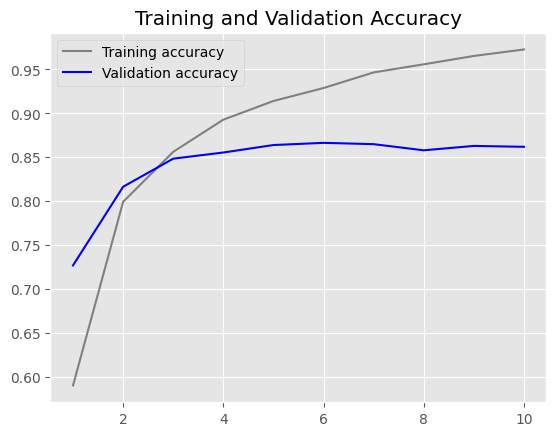

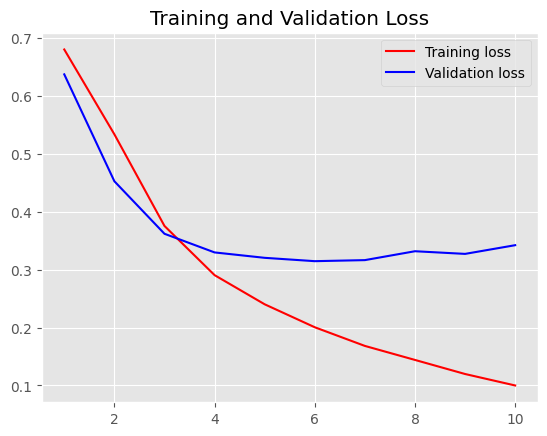

In [16]:
accuracy_v4 = training_history_v4.history["acc"]
validation_accuracy_v4 = training_history_v4.history["val_acc"]
train_loss_v4 = training_history_v4.history["loss"]
validation_loss_v4 = training_history_v4.history["val_loss"]

epochs_range_v4 = range(1, len(accuracy_v4) + 1)

plt.plot(epochs_range_v4, accuracy_v4, "grey", label="Training accuracy")
plt.plot(epochs_range_v4, validation_accuracy_v4, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs_range_v4, train_loss_v4, "red", label="Training loss")
plt.plot(epochs_range_v4, validation_loss_v4, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()


In [17]:
test_loss_v4, test_accuracy_v4 = neural_network_v4.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss_v4)
print('Test accuracy:', test_accuracy_v4)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8489 - loss: 0.3527
Test loss: 0.34992632269859314
Test accuracy: 0.8520399928092957


In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  3401k      0  0:00:24  0:00:24 --:--:-- 4728k


In [19]:
import os
import shutil

imdb_data = 'aclImdb'
train_data = os.path.join(imdb_data, 'train')

text_labels = []
text_data = []

for sentiment_type in ['neg', 'pos']:
    dir_path = os.path.join(train_data, sentiment_type)
    for filename in os.listdir(dir_path):
        if filename[-4:] == '.txt':
            with open(os.path.join(dir_path, filename), encoding='utf-8') as file:
                text_data.append(file.read())
            if sentiment_type == 'neg':
                text_labels.append(0)
            else:
                text_labels.append(1)


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_length = 150
train_sample_size = 100
validation_sample_size = 10000
top_words = 10000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

padded_data = pad_sequences(sequences, maxlen=max_length)

text_labels = np.asarray(text_labels)
print("Shape of data tensor:", padded_data.shape)
print("Shape of label tensor:", text_labels.shape)

indices = np.arange(padded_data.shape[0])
np.random.shuffle(indices)
padded_data = padded_data[indices]
text_labels = text_labels[indices]

x_train_data = padded_data[:train_sample_size]
y_train_data = text_labels[:train_sample_size]
x_validation_data = padded_data[train_sample_size:train_sample_size + validation_sample_size]
y_validation_data = text_labels[train_sample_size:train_sample_size + validation_sample_size]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [21]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_embedding_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip_data = requests.get(glove_embedding_url)


with zipfile.ZipFile(BytesIO(glove_zip_data.content)) as zip_file:
    zip_file.extractall('/content/glove_embeddings')
embedding_index = {}
with open('/content/glove_embeddings/glove.6B.100d.txt', encoding='utf-8') as glove_file:
    for line in glove_file:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefficients

print("Found %s word vectors." % len(embedding_index))


Found 400000 word vectors.


In [22]:
embedding_dimension = 100

embedding_matrix = np.zeros((top_words, embedding_dimension))
for word, index in word_index.items():
    embedding_vector = embedding_index.get(word)
    if index < top_words:
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector


In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(top_words, embedding_dimension, input_length=max_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dimension = embedding_matrix.shape[1]
vocab_size = embedding_matrix.shape[0]
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dimension,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_length,
        trainable=False
    )
)
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embedding_dimension = embedding_matrix.shape[1]
vocab_size = embedding_matrix.shape[0]

model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dimension,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_length,
        trainable=False
    )
)
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train_data, y_train_data,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation_data, y_validation_data)
)

model.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - acc: 0.4950 - loss: 0.7018 - val_acc: 0.5034 - val_loss: 0.6936
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - acc: 0.4731 - loss: 0.6957 - val_acc: 0.5117 - val_loss: 0.6909
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.4857 - loss: 0.6911 - val_acc: 0.5060 - val_loss: 0.6915
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - acc: 0.5073 - loss: 0.6899 - val_acc: 0.5056 - val_loss: 0.6915
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - acc: 0.5158 - loss: 0.6858 - val_acc: 0.5069 - val_loss: 0.6908
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - acc: 0.4960 - loss: 0.6886 - val_acc: 0.5175 - val_loss: 0.6893
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - acc: 0.4700 - loss: 0.6920 - val_acc: 0.5158 - val_loss: 0.6891
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 439ms/step - acc: 0.4234 - loss: 0.6885 - val_acc: 0.5152 - val_loss: 0.6891
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - acc: 0.5113 - loss: 

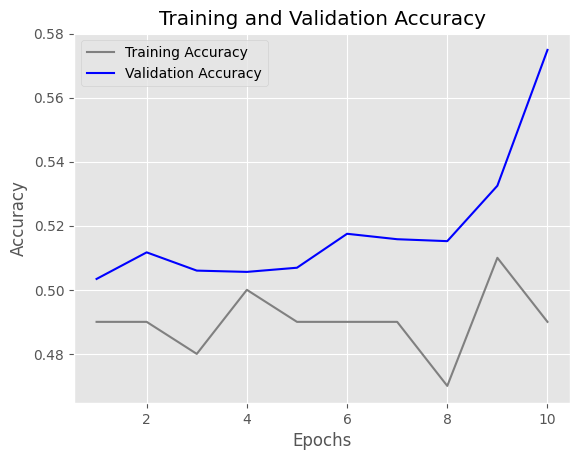

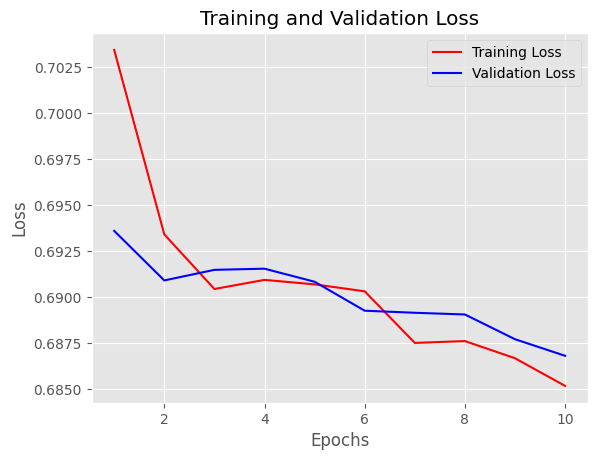

In [26]:
import matplotlib.pyplot as plt

train_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'grey', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_loss, 'red', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:

test_loss, test_accuracy = model.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4470 - loss: 0.6977
Test loss: 0.6972528100013733
Test accuracy: 0.4521600008010864


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.initializers import Constant


vocab_size = 10000
embedding_dim = 100
max_length = 150


model11 = Sequential()
model11.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        input_length=max_length,
        trainable=False
    )
)
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

model11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


history11 = model11.fit(
    x_train_data, y_train_data,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation_data, y_validation_data)
)


model11.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - acc: 0.5155 - loss: 2.5491 - val_acc: 0.5093 - val_loss: 0.7066
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - acc: 0.6791 - loss: 0.5675 - val_acc: 0.5004 - val_loss: 0.7902
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - acc: 0.8464 - loss: 0.3213 - val_acc: 0.5385 - val_loss: 0.7281
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - acc: 0.8593 - loss: 0.3213 - val_acc: 0.4983 - val_loss: 1.1291
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - acc: 0.9227 - loss: 0.2029 - val_acc: 0.5560 - val_loss: 0.7283
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - acc: 1.0000 - loss: 0.0735 - val_acc: 0.5068 - val_loss: 1.0578
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 0.1266 - val_acc: 0.5621 - val_loss: 0.7175
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - acc: 1.0000 - loss: 0.0339 - val_acc: 0.5578 - val_loss: 0.7708
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - acc: 1.0000 - loss: 

In [29]:

test_loss11, test_accuracy11 = model11.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5005 - loss: 0.7981
Test loss: 0.7974557876586914
Test accuracy: 0.49935999512672424


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
length2 = 150
model11.layers[0].build(input_shape=(None, length2))


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - acc: 0.7767 - loss: 0.6653 - val_acc: 0.5622 - val_loss: 0.7815
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - acc: 1.0000 - loss: 0.0101 - val_acc: 0.5638 - val_loss: 0.7817
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - acc: 1.0000 - loss: 0.0089 - val_acc: 0.5620 - val_loss: 0.7936
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - acc: 1.0000 - loss: 0.0074 - val_acc: 0.5651 - val_loss: 0.7806
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0066 - val_acc: 0.5612 - val_loss: 0.8010
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - acc: 1.0000 - loss: 0.0056 - val_acc: 0.5612 - val_loss: 0.8110
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - acc: 1.0000 - loss: 0.0052 - val_acc: 0.5678 - val_loss: 0.7942
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 1.0000 - loss: 0.0040 - val_acc: 0.5635 - val_loss: 0.8225
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - acc: 1.0000 - loss: 

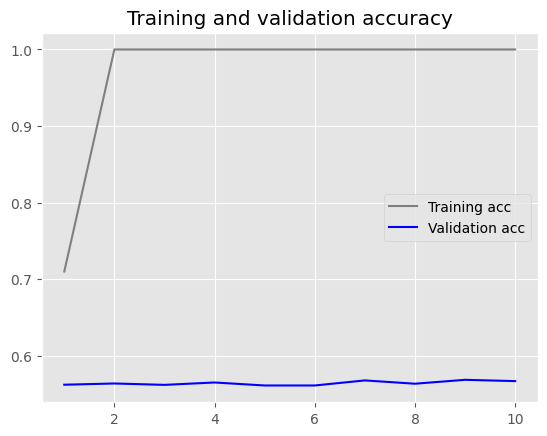

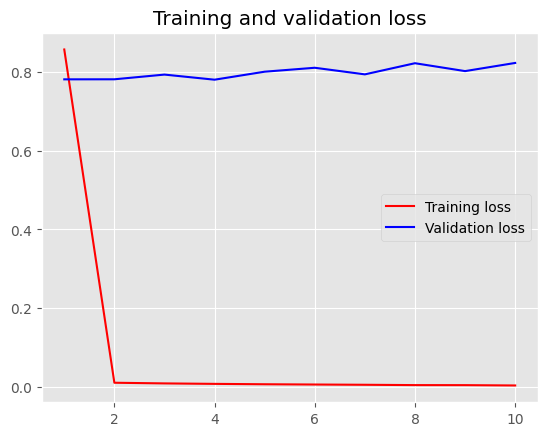

In [32]:
model11.layers[0].build(input_shape=(None, length2))

model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

model11.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

history11 = model11.fit(
    x_train_data, y_train_data,
    epochs=10,
    batch_size=32,
    validation_data=(x_validation_data, y_validation_data)
)


model11.save_weights('pre_trained_glove_model.weights.h5')


import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'grey', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'red', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:

test_loss11, test_accuracy11 = model11.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5085 - loss: 0.8988
Test loss: 0.9007054567337036
Test accuracy: 0.5049999952316284


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.4955 - loss: 1.1194 - val_acc: 0.5015 - val_loss: 0.6932
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.5960 - loss: 0.6807 - val_acc: 0.4971 - val_loss: 1.1151
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - acc: 0.5770 - loss: 0.7124 - val_acc: 0.5001 - val_loss: 0.7889
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.7433 - loss: 0.5152 - val_acc: 0.5022 - val_loss: 1.3120
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.7404 - loss: 0.5506 - val_acc: 0.5001 - val_loss: 0.9826
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.8454 - loss: 0.3598 - val_acc: 0.4976 - val_loss: 1.3291
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8550 - loss: 0.3325 - val_acc: 0.5064 - val_loss: 0.8725
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - acc: 0.9708 - loss: 0.1861 - val_acc: 0.4995 - val_loss: 0.9419
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.9693

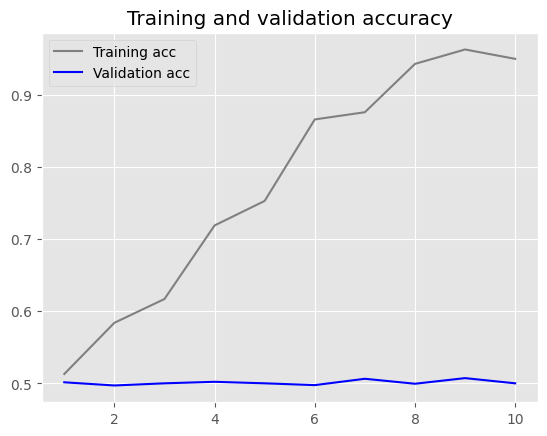

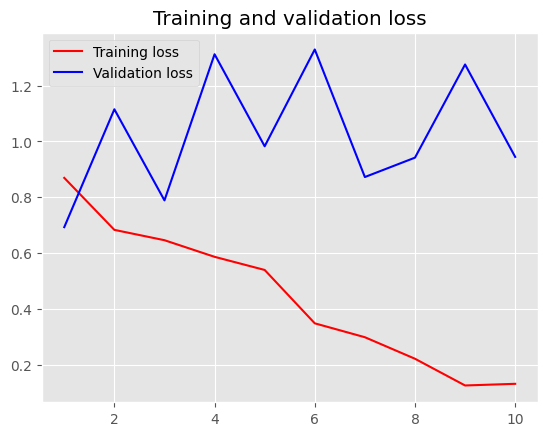

In [34]:

import numpy as np
import matplotlib.pyplot as plt

length = 150
train_data = 1000
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(text_data)
sequences = tokenizer3.texts_to_sequences(text_data)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=length)

labels = np.asarray(text_labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_val = data[train_data:train_data + valid_data]
y_val = labels[train_data:train_data + valid_data]

embedding_dim = 100
embedding_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if i < words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=length))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

model12.layers[0].build(input_shape=(None, length))

model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False

model12.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history12 = model12.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

model12.save_weights('pre_trained_glove_model.weights.h5')

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'grey', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss12, 'red', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [35]:
test_loss12, test_accuracy12 = model12.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4920 - loss: 0.9492
Test loss: 0.9421907663345337
Test accuracy: 0.4941200017929077


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.5121 - loss: 1.3897 - val_acc: 0.4991 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.5271 - loss: 0.6948 - val_acc: 0.5092 - val_loss: 0.6967
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.6168 - loss: 0.6759 - val_acc: 0.5022 - val_loss: 0.8523
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.6767 - loss: 0.6084 - val_acc: 0.5007 - val_loss: 0.9046
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7274 - loss: 0.5883 - val_acc: 0.4958 - val_loss: 0.9810
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.7775 - loss: 0.4494 - val_acc: 0.4996 - val_loss: 0.7755
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9024 - loss: 0.2821 - val_acc: 0.5021 - val_loss: 0.7966
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9670 - loss: 0.1704 - val_acc: 0.5014 - val_loss: 0.8376
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9845

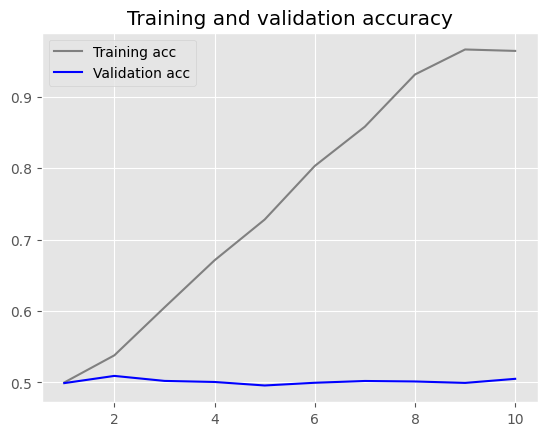

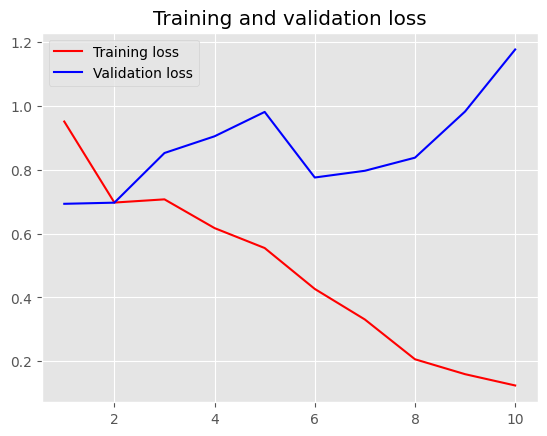

In [36]:
model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=length))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.layers[0].build(input_shape=(None, length))
model13.layers[0].set_weights([embedding_matrix])  # Change from 'embedd_matrix' to 'embedding_matrix'
model13.layers[0].trainable = False

model13.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

history13 = model13.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val)
)

model13.save_weights('pre_trained_glove_model.weights.h5')

# Plot results
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'grey', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'red', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [37]:
test_loss13, test_accuracy13 = model13.evaluate(x_test_data, y_test_data)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4865 - loss: 1.2525
Test loss: 1.2324707508087158
Test accuracy: 0.4952400028705597
